In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
# Load dataset
Data = pd.read_csv('Train.csv')

In [3]:
Data.head(3)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0


In [4]:
Data.shape

(40000, 2)

#### Data Visualization

In [5]:
data = Data.copy()

In [6]:
data['label'] = np.where(data['label'] == 0 , 'Negative' , 'Positive')

Negative    20019
Positive    19981
Name: label, dtype: int64


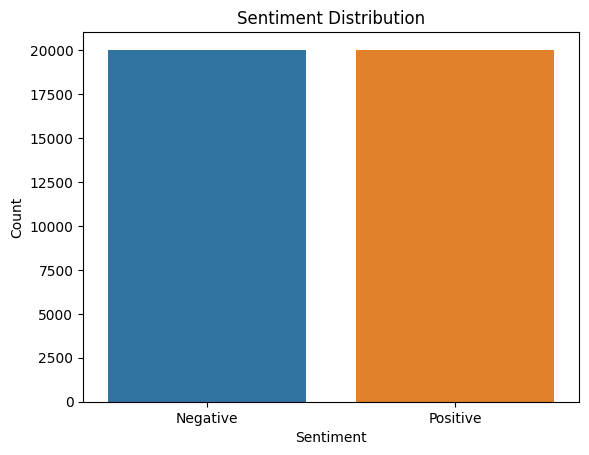

In [7]:
# Plot the distribution of sentiment labels
sns.countplot(x= data['label'], data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
print(data['label'].value_counts())
plt.show()

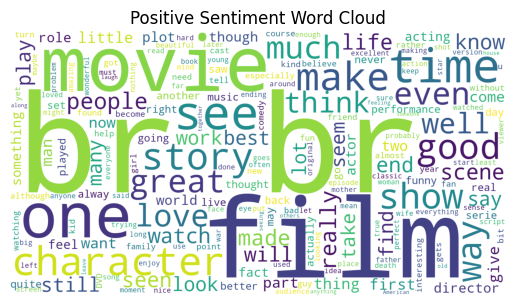

In [8]:
# Plot the word cloud for positive and negative sentiments
from wordcloud import WordCloud
# Create a word cloud for positive sentiment
positive_text = ' '.join(data[data['label']=='Positive']['text'])
wordcloud = WordCloud(width=1500, height=800, background_color='white').generate(positive_text)
plt.imshow(wordcloud)
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()

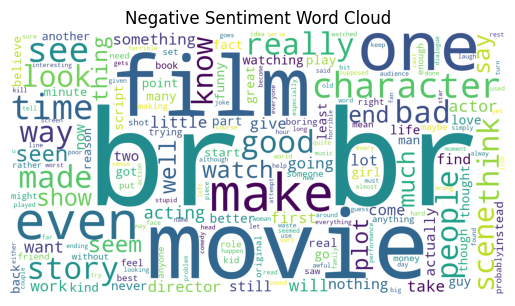

In [9]:
# Create a word cloud for negative sentiment
negative_text = ' '.join(data[data['label']=='Negative']['text'])
wordcloud = WordCloud(width=1500, height=800, background_color='white').generate(negative_text)
plt.imshow(wordcloud)
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

#### Preprocessing Steps

In [10]:
# Define a function to preprocess text
def preprocess_text(text):
    # Lowercasing, remove url, remove punctuations, remove duplicate whitespaces and digits
    text = text.lower()
    text = re.sub(r'http\S+', '', text) #remove url
    text = re.sub(r'[^\w\s]', '', text) #remove punctuations
    text = re.sub(r"0\S+" , '',  text) #remove words that start with
    text = re.sub(r'\s+', ' ',   text) #remove duplicate whitespaces
    text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join the words back into a string
    text = ' '.join(tokens)
    return text

In [11]:
# Apply the preprocessing function to the text column
Data['text'] = Data['text'].apply(preprocess_text)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Data['text'], Data['label'], test_size=0.2, random_state=42)

#### Feature Extraction

In [14]:
# Create a Bag-of-Words model
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#### Training the Model

In [15]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

#### Testing the Model

In [16]:
# Predict the sentiment for the test data
y_pred = classifier.predict(X_test)

In [17]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [18]:
# Mapping the predicted sentiment to emoji
emoji_dict = {
    1: '😀',
    0: '😞'
}

In [19]:
predicted_emoji = [emoji_dict[sentiment] for sentiment in y_pred]

In [21]:
print("Accuracy:",accuracy)

Accuracy: 0.855


#### Sample Test

In [22]:
sample = "I loved the movie, it was amazing!"
preprocessed_text = preprocess_text(sample)
preprocessed_text = [preprocessed_text]
vectorised = vectorizer.transform(preprocessed_text)
predict = classifier.predict(vectorised)
emoji = emoji_dict[predict[0]]
print("Sample text:",sample)
print("Emoji:",emoji)

Sample text: I loved the movie, it was amazing!
Emoji: 😀
